In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [3]:
circuit = QuantumCircuit(qr, cr)

c:\Users\wolle\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


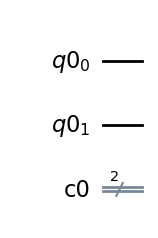

In [4]:
%matplotlib inline 
circuit.draw(output='mpl')

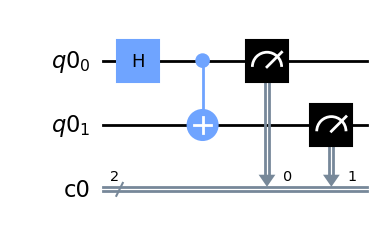

In [5]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')

In [7]:
result = execute(circuit, backend=simulator, shots=1024).result()

In [8]:
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi

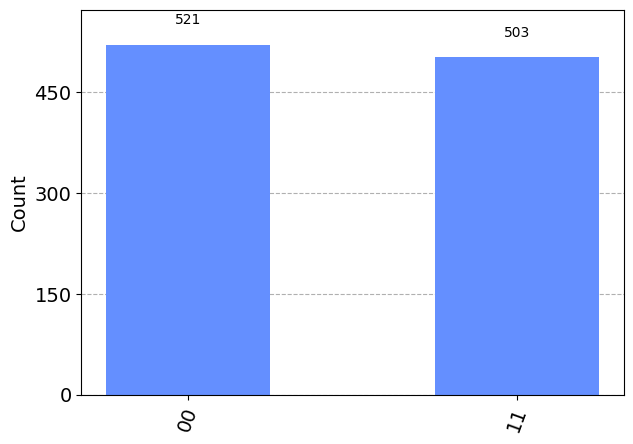

In [9]:
plot_histogram(result.get_counts(circuit))

In [10]:
from qiskit import IBMQ

In [11]:
IBMQ.save_account('e9857a49c124d22110b0c577754d160e984ce3f01e5ef110ae6295f3f6c4a6f337a129dfdcb5a1191a9b8c69317e9ae32ed4d196b744571d45453db7fb56d933')

C:\Users\wolle\AppData\Local\Temp\ipykernel_5500\2537760872.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('e9857a49c124d22110b0c577754d160e984ce3f01e5ef110ae6295f3f6c4a6f337a129dfdcb5a1191a9b8c69317e9ae32ed4d196b744571d45453db7fb56d933')
C:\Users\wolle\AppData\Local\Temp\ipykernel_5500\2537760872.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'

In [12]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
provider = IBMQ.get_provider(hub = 'ibm-q')

In [14]:
qcomp = provider.get_backend('ibm_brisbane')

In [15]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [16]:
job = execute(circuit, backend=qcomp)

In [17]:
result = job.result()
plot_histogram(result.get_counts(circuit))